In [2]:
#!pip install torch torchvision torchaudio

In [12]:
import torch
torch.__version__

'2.7.1+cpu'

In [13]:
x=torch.rand(3,3)
print(x)

tensor([[0.0402, 0.9447, 0.6303],
        [0.8127, 0.5090, 0.7119],
        [0.5473, 0.8494, 0.2332]])


In [14]:
import torch as to
import matplotlib.pyplot as plt
#from tensorflow.keras import models
#from tensorflow.keras import layers
%matplotlib inline
import numpy as np
import pandas as pd

In [15]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(
    root="C:/Users/Neeraj/Downloads/archive/Training",
    transform=transform
)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, num_workers=0)



In [7]:
import torch.nn as nn
import torch.nn.functional as F

class TumorCNN(nn.Module):
    def __init__(self):
        super(TumorCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 56 * 56, 128)  # For 224x224 input
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # (3x224x224 -> 16x112x112)
        x = self.pool(F.relu(self.conv2(x)))  # (16x112x112 -> 32x56x56)
        x = x.view(-1, 32 * 56 * 56)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Binary classification output
        return x


In [8]:
import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TumorCNN().to(device)

criterion = nn.BCELoss()  # Binary cross entropy for sigmoid output
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [9]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")


Epoch [1/10], Loss: 0.2227
Epoch [2/10], Loss: 0.0702
Epoch [3/10], Loss: 0.0260
Epoch [4/10], Loss: 0.0087
Epoch [5/10], Loss: 0.0103
Epoch [6/10], Loss: 0.0036
Epoch [7/10], Loss: 0.0008
Epoch [8/10], Loss: 0.0001
Epoch [9/10], Loss: 0.0001
Epoch [10/10], Loss: 0.0001


In [10]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        predicted = (outputs > 0.5).int().squeeze()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.98


In [11]:
torch.save(model.state_dict(), "tumor_cnn.pth")


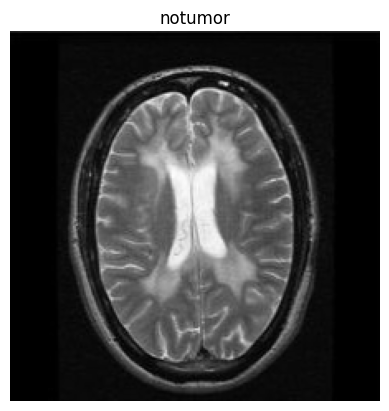

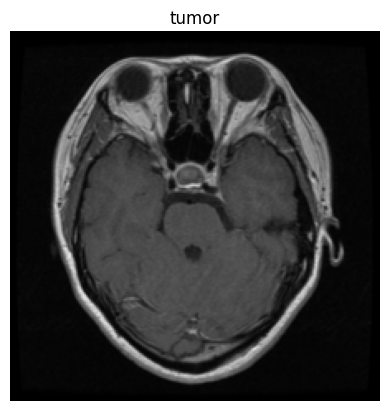

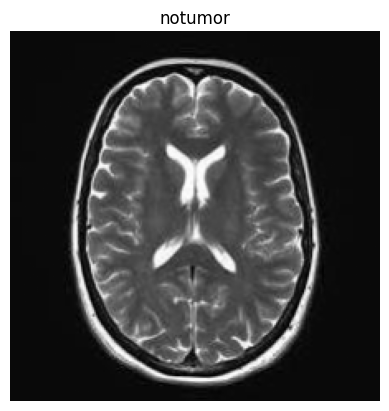

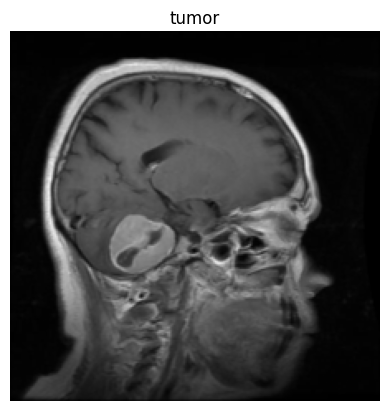

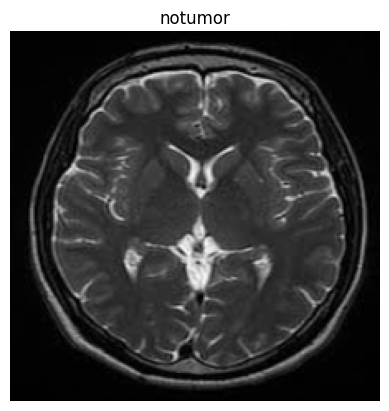

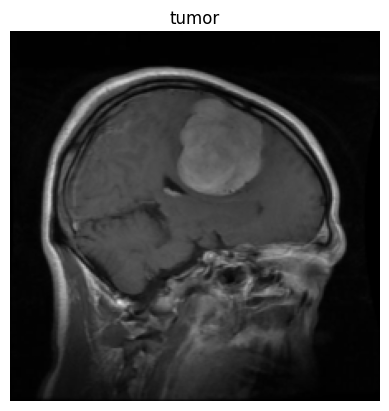

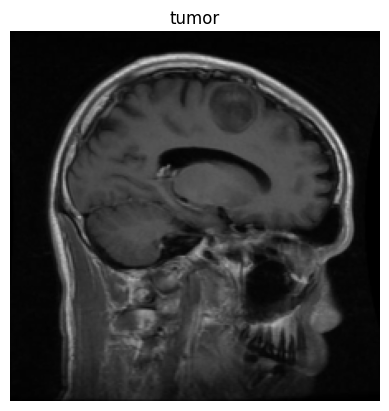

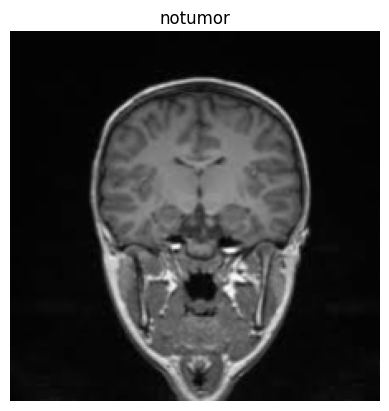

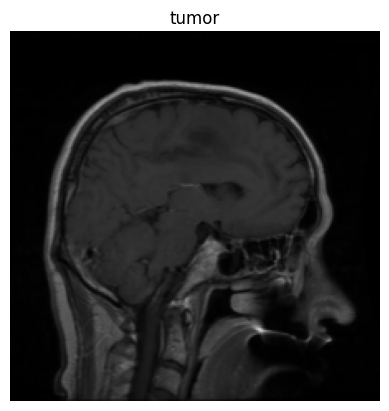

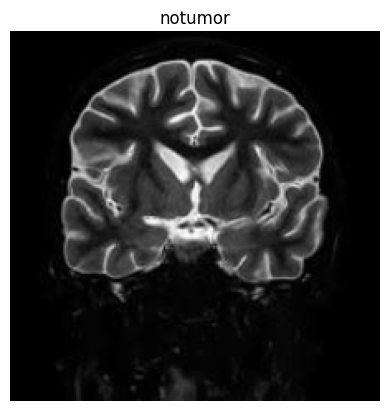

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Classes from the dataset
class_names = dataset.classes  # e.g., ["No_Tumor", "Tumor"]

# Show some sample images
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display first 5 images
for i in range(10):
    imshow(images[i], title=class_names[labels[i]])


In [27]:
## Sample code for Resnet18
'''import torch
import torch.nn as nn
import torchvision.models as models

# Number of classes
num_classes = 4  # glioma, meningioma, notumor, pituitary

# Load base ResNet18 without pretrained weights first
model = models.resnet18(weights=None)

# Load pretrained weights manually
state_dict = torch.load(r"C:\Users\Neeraj\Downloads\resnet18-f37072fd.pth")

# Strict=False -> ignores final layer mismatch
model.load_state_dict(state_dict, strict=False)

# Replace final layer AFTER loading weights
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
'''


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 307-308: truncated \UXXXXXXXX escape (123542582.py, line 2)

In [ ]:
## Error
'''num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")'''


In [23]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

print("Step 1: Defining transform ✅")
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

print("Step 2: Loading dataset ✅")
dataset = datasets.ImageFolder(
    root="C:/Users/Neeraj/Downloads/archive/Training",
    transform=transform
)
print("Dataset loaded. Total samples:", len(dataset))

print("Step 3: Splitting dataset ✅")
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
print(f"Train size: {len(train_dataset)}, Val size: {len(val_dataset)}")

print("Step 4: Creating DataLoader ✅")
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=0)

print("Step 5: Iterating over 1 batch ✅")
for images, labels in train_loader:
    print("Batch OK ✅", images.shape, labels.shape)
    break

print("✅ All steps completed — dataloader works")


Step 1: Defining transform ✅
Step 2: Loading dataset ✅
Dataset loaded. Total samples: 5712
Step 3: Splitting dataset ✅
Train size: 4569, Val size: 1143
Step 4: Creating DataLoader ✅
Step 5: Iterating over 1 batch ✅
Batch OK ✅ torch.Size([8, 3, 128, 128]) torch.Size([8])
✅ All steps completed — dataloader works


In [ ]:
'''num_epochs = 1
model.train()
for i, (images, labels) in enumerate(train_loader):
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (i + 1) % 5 == 0:
        print(f"Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")'''


In [24]:
len(train_loader)

572

In [28]:
## tqdm gives a real-time progress bar per epoch which is super handy on CPU

from tqdm import tqdm

num_epochs = 1

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]")
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        loop.set_postfix(loss=loss.item())


Epoch [1/1]: 100%|█████████████████████████████████████████████████████| 572/572 [05:27<00:00,  1.75it/s, loss=0.00162]


In [29]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")


Validation Accuracy: 95.80%
